<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/01_neural_ntewrok_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NN in Tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating  a data to view and fit 

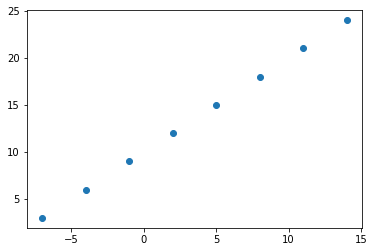

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create features

X = np.array([-7.,-4.0,-1,2.0,5.0,8,11,14.0])
X
#Create labels
y = np.array([3,6,9.0,12,15.0,18,21,24])
plt.scatter(X,y)

In [4]:
y ==X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

** Input and output shapes

In [5]:
##create a demo tensor for out housing price prediction problme
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [7]:
# trun numpyt array tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

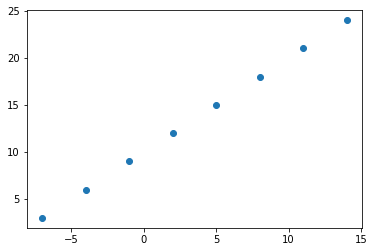

In [8]:
plt.scatter(X,y)

#Steps in modelling with Tensor flow

In [9]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

# Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

#fit the model
model.fit(X,y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 584ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

#improving the model

In [11]:
#lets rebuild out model
# 1. Create amodel
model_imporve = tf.keras.Sequential([
                                     tf.keras.layers.Dense(50,activation=None),
                                     tf.keras.layers.Dense(1)
                                     ])
# 2. Comiple the model
model_imporve.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      metrics=['mae'])
#3. Fit the model
model_imporve.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [12]:
model_imporve.predict([17.0])

array([[26.434414]], dtype=float32)

Evaluating a model

1. Creating more data 

In [13]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

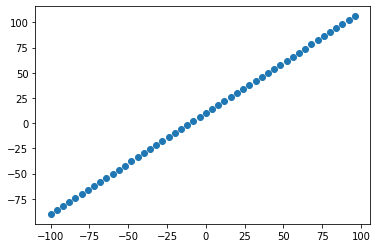

In [15]:
# visualize the data 
import matplotlib.pyplot as plt
plt.scatter(X,y)

#split the data in Training and  Testing format.
* Training data is usually 80% of data
* Testing data is usually 20% of data for testing the model 


In [16]:
X_train = X[:40]
X_test = X[40:]

y_train =y[:40]
y_test =y[40:]


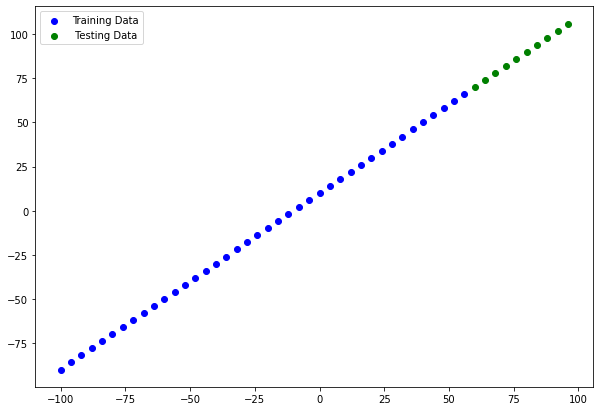

In [17]:
#visualize the training and test data

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b", label="Training Data")
plt.scatter(X_test,y_test,c="g", label =" Testing Data")
plt.legend()

In [18]:
# 1. Create a model

model_huge = tf.keras.Sequential([
                                  tf.keras.layers.Dense(10,name="input_layer"),
                                  tf.keras.layers.Dense(1,name="output_layer"),
                                
],name="huge_model")

#2. Compile the model
model_huge.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["mae"]
)

#3. Fit the model

model_huge.fit(X_train,y_train, epochs =100, verbose=0)
model_huge.summary()

Model: "huge_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


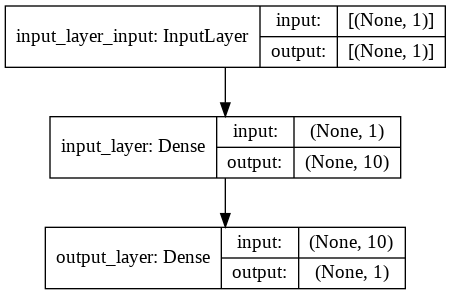

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_huge, show_shapes=True)

## Visualizing our models predictions

In [20]:
y_pred = model_huge.predict(X_test)
y_pred

array([[ 69.868454],
       [ 73.85556 ],
       [ 77.84266 ],
       [ 81.829765],
       [ 85.816864],
       [ 89.80397 ],
       [ 93.79108 ],
       [ 97.778175],
       [101.76529 ],
       [105.752396]], dtype=float32)

In [21]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [22]:
# Lets create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b", label="Training Data")
  plt.scatter(test_data,test_labels,c="g", label="Testing Data")
  plt.scatter(test_data,predictions,c="r", label="Predictions")
  plt.legend();



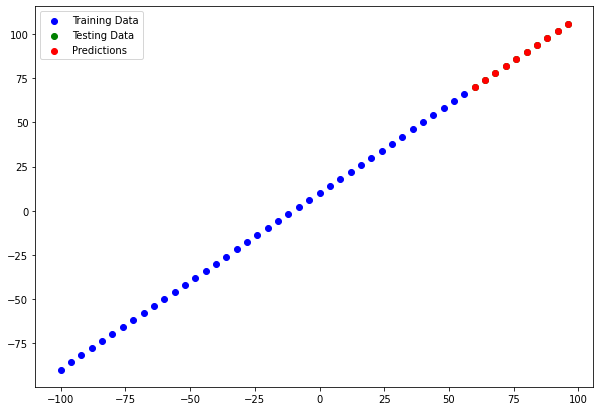

In [23]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

## Evaluating our models prediction with regression evaluation metrics

In [24]:
model_huge.evaluate(X_test,y_test)

1/1 [==============================] - 0s 112ms/step - loss: 0.1896 - mae: 0.1896


[0.18958130478858948, 0.18958130478858948]

In [25]:
#Convert the y_pred to tensor

y_test, y_pred

y_pred=tf.squeeze(tf.constant(y_pred))

In [26]:
mae_1 = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=0.18957901>

In [27]:
mse_1 = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=0.03731218>

#lets make function for mae and mse

In [28]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, 
                                        y_pred=y_pred)
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)
  

In [29]:
# Create a new improvement model with more epochs
#1.Create model
model_im_1 = tf.keras.Sequential([
                                  tf.keras.layers.Dense(50),
                                  tf.keras.layers.Dense(1)
],name="model_improvement_1")

model_im_1.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics=["mse"])
model_im_1.fit(X_train,y_train, epochs=100)
model_im_1.summary()

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 38.5823 - mse: 2061.5188
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 30.0540 - mse: 1181.2529
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 34.5847 - mse: 1817.3695
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 30.0421 - mse: 1336.4307
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.3319 - mse: 299.9452
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1783 - mse: 183.1089
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4819 - mse: 160.4214
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2175 - mse: 175.3141
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 41.8776 - mse: 2796.3372
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 29.0908 - mse: 1196.5226
Epoch 11/100
2/2 [=========================

(<tf.Tensor: shape=(), dtype=float32, numpy=13.30514>,
 <tf.Tensor: shape=(), dtype=float32, numpy=187.11227>)

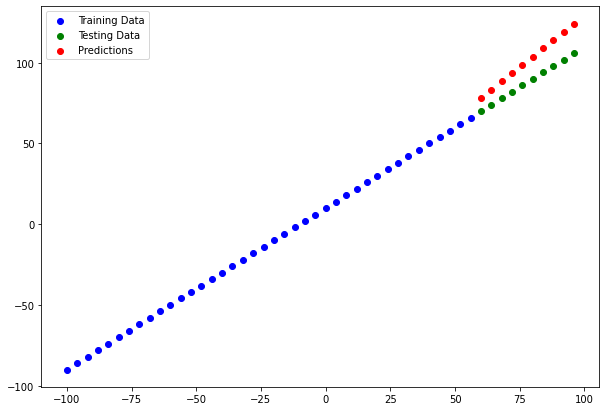

In [30]:
y_pred_model_im_1 = model_im_1.predict(X_test)
plot_predictions(predictions=y_pred_model_im_1)
mae_im1 = mae(y_test,y_pred=tf.squeeze(y_pred_model_im_1))
mse_im1 = mse(y_test,y_pred=tf.squeeze(y_pred_model_im_1))
mae_im1,mse_im1 

In [31]:
# Create a model with 500 epochs

model_im_2 = tf.keras.Sequential([
                                  tf.keras.layers.Dense(50),
                                  tf.keras.layers.Dense(1)
])
model_im_2.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mse"])
model_im_2.fit(X_train,y_train,epochs=500)
model.summary()

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 27.4863 - mse: 1358.1165
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.9833 - mse: 878.3484
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.9332 - mse: 1348.0040
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 16.3894 - mse: 385.6161
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 22.5929 - mse: 747.9679
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9811 - mse: 133.4425
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.0116 - mse: 181.2243
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 10.9151 - mse: 132.9997
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 37.8055 - mse: 2201.5361
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.4254 - mse: 907.2096
Epoch 11/500
2/2 [============================

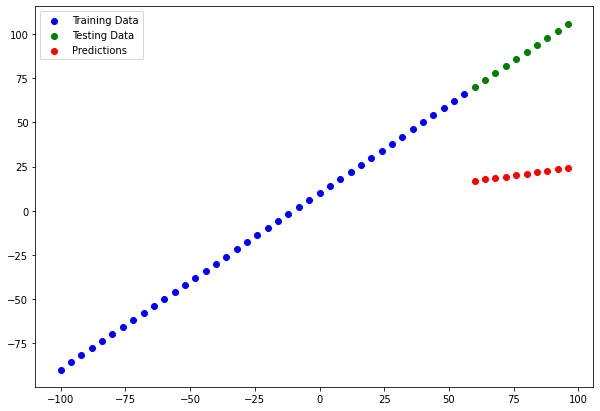

In [32]:
y_pred_im_2 = model_im_2.predict(X_test)
plot_predictions(predictions=y_pred_im_2)


In [33]:
mae_3 = mae(y_true=y_test, y_pred=tf.squeeze(y_pred_im_2))
mse_3 = mse(y_true=y_test, y_pred=tf.squeeze(y_pred_im_2))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42881>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4630.2188>)

In [34]:
import pandas as pd
model_results = [["model_huge",mae_1.numpy(),mse_1.numpy()],
                 ["model_im_1",mae_im1.numpy(), mse_im1.numpy()],
                 ["model_im_2",mae_3.numpy(),mse_3.numpy()]]
all_models=pd.DataFrame(model_results,columns=["Model","mae","mse"])
all_models

,Model,mae,mse
0,model_huge,0.189579,0.037312
1,model_im_1,13.305140,187.112274
2,model_im_2,67.428810,4630.218750


In [35]:
model_huge.summary()

Model: "huge_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Saving our models -- to use them outside colab - eg: in Web apps or mobile apps.


In [36]:
model_huge.save("best_model_till_now")

INFO:tensorflow:Assets written to: best_model_till_now/assets


In [37]:
model_huge.save("best_model_till_now.h5")

In [38]:
#Loading the saved model
loaded_SavedModel_format=tf.keras.models.load_model ("/content/best_model_till_now")
loaded_SavedModel_format.summary()

Model: "huge_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#Lets work on larger models now.

In [39]:
#import necessary libs

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
#One hot encode the data using pandas dummies function

insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [42]:
#1. Create X and Y features and Lables.
X = insurance_one_hot.drop("charges", axis=1)
y = insurance["charges"]
X.head(),y.head()


(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [43]:
#2. Create training and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test),

(1338, 1070, 268)

In [44]:
X_train


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [45]:
# Build neural network model
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
],name = "insuarance_model")

#2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])
#fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [46]:
insurance_model.summary()

Model: "insuarance_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Check the against test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

#Right  now model is not performing well
  1. Try changin optimizer 
  2. Train for longer epochs
  


In [48]:
tf.random.set_seed(42)
# Create a model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit the model
history_2=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [49]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

Text(0, 0.5, 'loss')

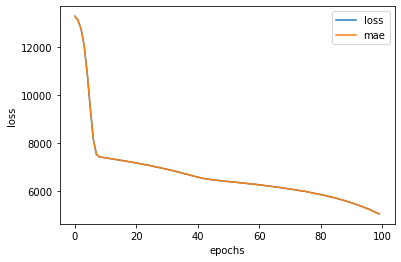

In [50]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


In [51]:
#Now since the loss is decreasing lets train the model for larger epochs.
tf.random.set_seed(42)

#Create a model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
], name="insurance_model_3")

#compile the model

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#fit the model
history_3=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

Text(0, 0.5, 'loss')

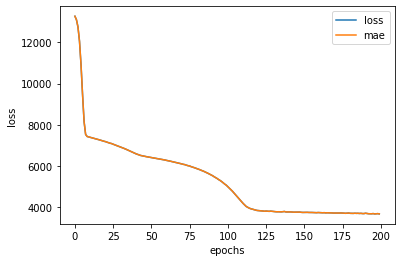

In [52]:
pd.DataFrame(history_3.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


# Lets pre process the data 
--> Normalizing it or Standardising it 

In [53]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [61]:
column_transformer = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [62]:
#Create X and y (features and lables.)
X=insurance_data.drop("charges",axis=1)
y=insurance_data["charges"]


In [64]:
#Create testing and trianing data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [69]:
# # Fit column transformer on the training data only (doing so on test data would result in data leakage)
column_transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [71]:
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

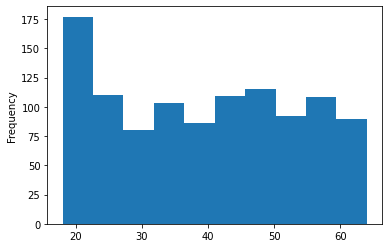

In [84]:
X_train["age"].plot(kind="hist")


In [76]:
# Build the tensor flow model ob pre process data
tf.random.set_seed(42)

#Create a model
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
], name="Insurance_pre_processed_model")

#Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#fit the model

history_4=insurance_model_4.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [78]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.5776 - mae: 3171.5776


[3171.57763671875, 3171.57763671875]

Text(0, 0.5, 'loss')

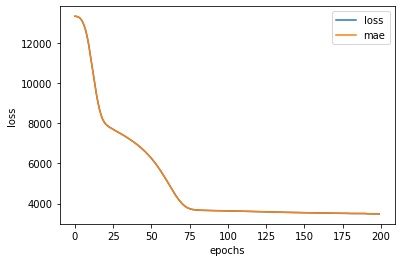

In [79]:
pd.DataFrame(history_4.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")